In [ ]:
library(mixOmics)

In [1]:
RNA.m<-read.csv("seqdata_vstnorm.csv",row.names = 1)
Low.m<-cbind(RNA.m[,1],sapply(1:5,function(i) RNA.m[,1]+0.05*rnbinom(nrow(RNA.m), mu = mean(RNA.m[,1]), size = 5400)))
High.m<-cbind(RNA.m[,4],sapply(1:5,function(i) RNA.m[,4]+0.05*rnbinom(nrow(RNA.m), mu = mean(RNA.m[,4]), size = 5400)))
total_RNA.m<-t(cbind(Low.m,High.m))
colnames(total_RNA.m)<-rownames(RNA.m)

[1] 12

In [2]:
meta.m<-read.csv("wtHL_cpd_path_stats_data_mancur.csv",row.names = 1)
idx<-which(meta.m[,5]%in%c("NULL","empty"))
row.n<-paste(meta.m[-idx,5],meta.m[-idx,1],sep = "_")
kegg_meta.m<-meta.m[-idx,12:23]
idx<-which(duplicated(row.n))
kegg_meta.m<-kegg_meta.m[-idx,]
rownames(kegg_meta.m)<-row.n[-idx]
kegg_meta.m<-t(kegg_meta.m[,c(1,8:12,2:7)])

In [28]:
rownames(total_RNA.m)=rownames(kegg_meta.m)

In [39]:
X=list(RNA=total_RNA.m,metabolite=kegg_meta.m)

In [40]:
Y=c(rep(0,6),rep(1,6))

In [42]:
re=block.plsda(X,Y)

In [43]:
re$indY

[1] 3

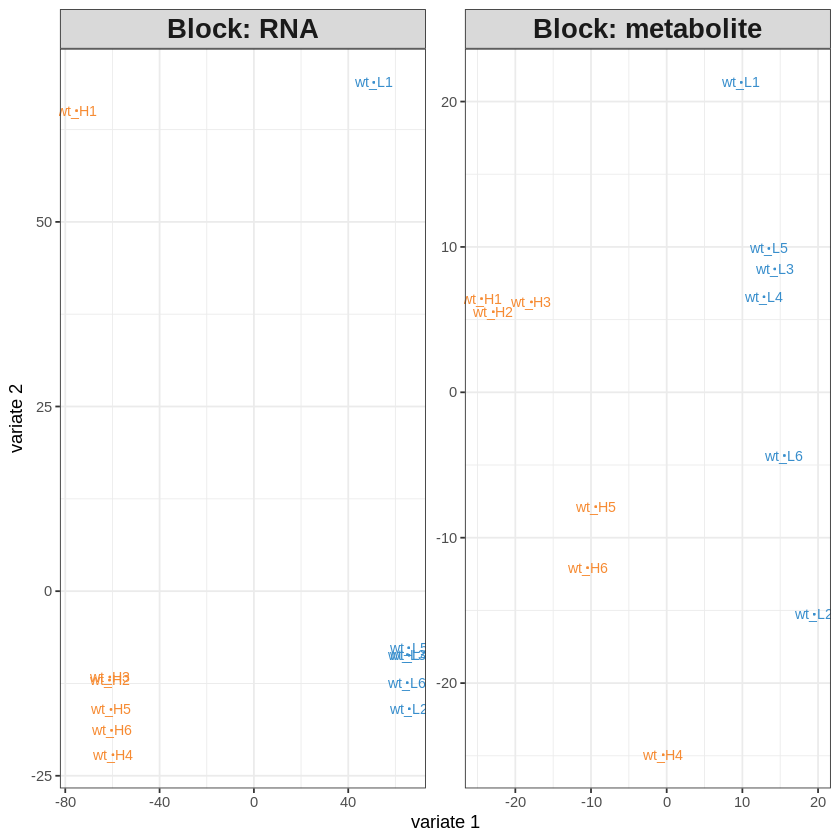

In [44]:
plotIndiv(re)

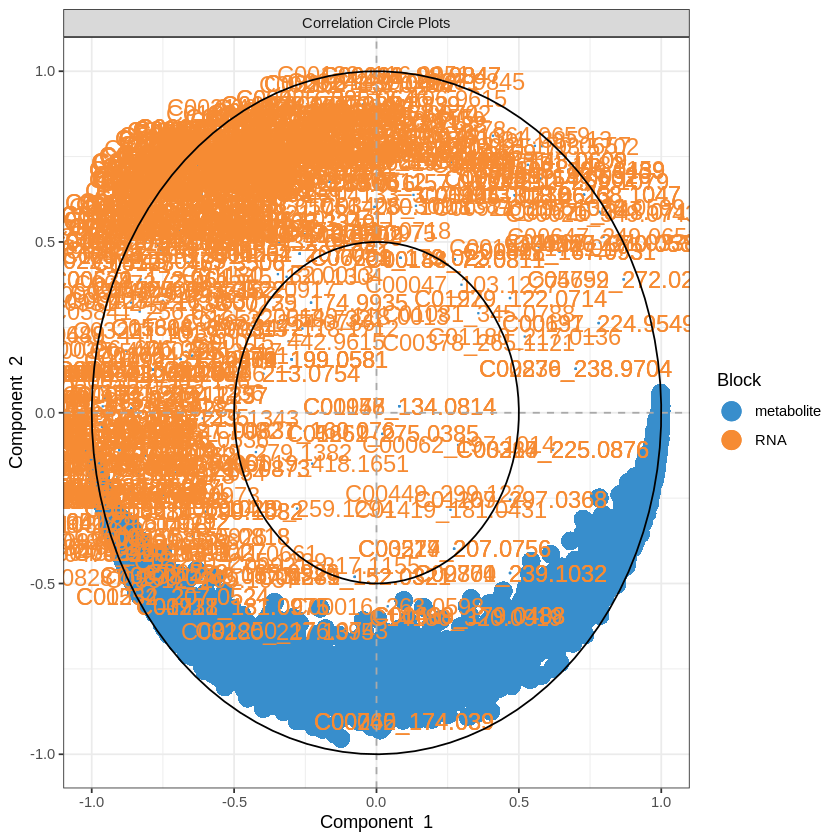

In [46]:
plotVar(re, var.names = c(FALSE, TRUE),
        legend=TRUE, pch=c(16,1))

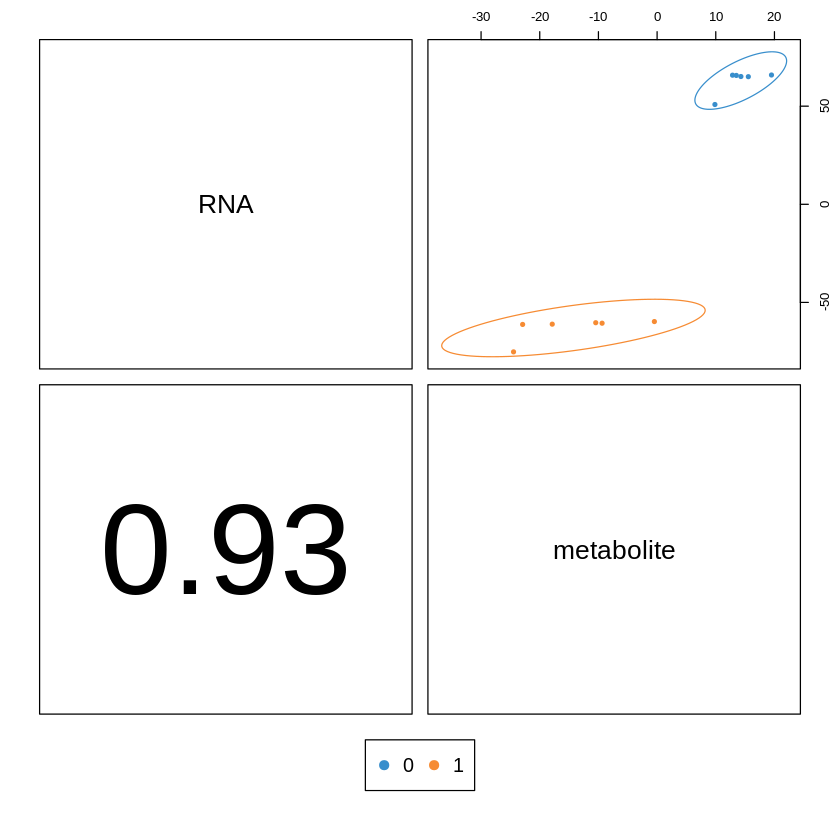

In [58]:
plotDiablo(re, ncomp = 1)

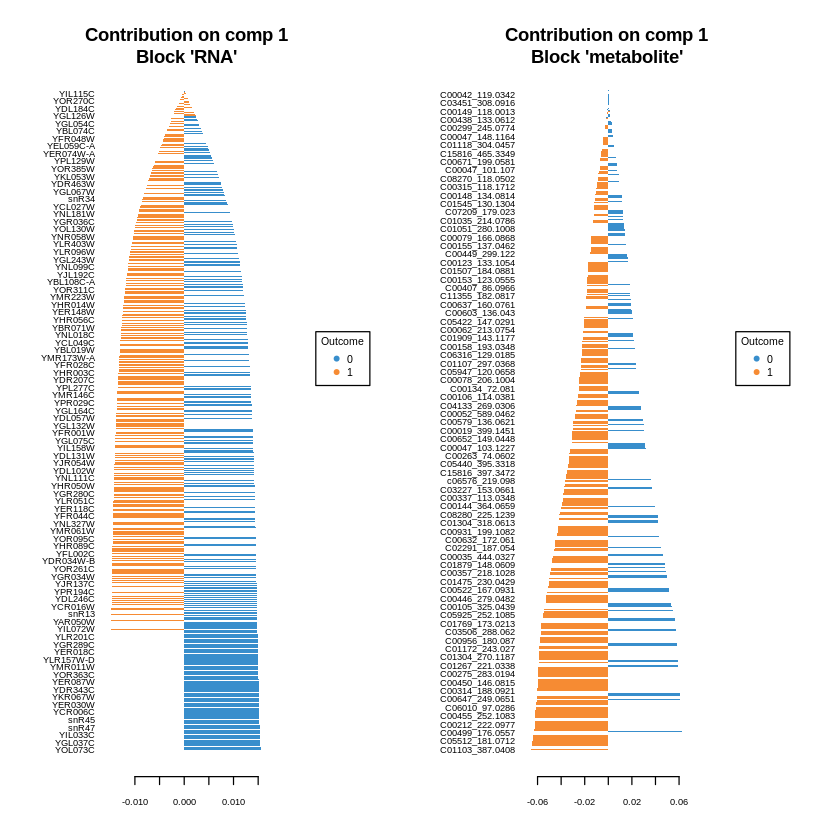

In [52]:
plotLoadings(re, comp = 1, contrib = "max")

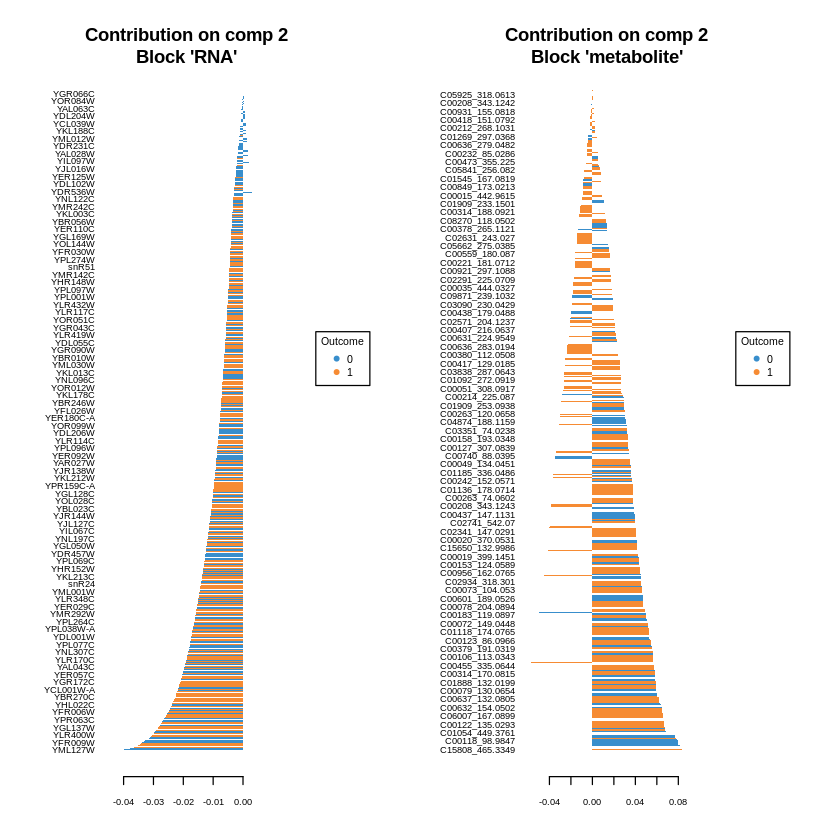

In [53]:
plotLoadings(re, comp = 2, contrib = "max")

In [56]:
network(re, blocks = c(1,2),
        color.node = c('darkorchid', 'brown1'), 
        cutoff = 0.8, save = 'jpeg', name.save = 'test')